In [1]:
#import ROOT
#import numpy as np
import matplotlib.pyplot as plt
from melp import Detector
#import melp

Welcome to JupyROOT 6.24/04


In [2]:
#test = melp.TileHitAngle("sorted_truth.root", "outtest_1")
#test = melp.TileHitAngle("mu3e_run_050000.root", "outtest_big")

In [3]:
#mu3e_detector = dt.Detector(test.tile_id_pos, test.tile_id_pos, [0,1,2])

In [4]:
mu3e_detector = Detector.initFromROOT("sorted_truth.root")
#mu3e_detector = dt.Detector.initFromSave("test_detector_file")

------------------------------
Created Detector geometry

Stats:
  - Tiles:  5824
  - Pixel Modules:  2844
------------------------------


In [5]:
#mu3e_detector.save("test_detector_file")

In [6]:

for i in mu3e_detector.Tiles.tile:
    print(mu3e_detector.Tiles.tile[i].pos)

[59.828, -10.035394536951584, -566.915]
[59.828, -3.2500300646546325, -566.915]
[59.828, 3.2500300646546325, -566.915]
[59.828, 10.035394536951584, -566.915]
[58.2573599340784, 16.916818289013875, -566.915]
[55.31330062556276, 23.030220435924555, -566.915]
[52.4930302321691, 28.886572251925976, -566.915]
[49.548970923653464, 34.99997439883666, -566.915]
[45.14813525358074, 40.51844778167913, -566.915]
[39.84312368911891, 44.74905333205085, -566.915]
[34.76117204208971, 48.80177453414373, -566.915]
[29.456160477627883, 53.03238008451545, -566.915]
[23.096768680569472, 56.09490176503158, -566.915]
[16.481527462200273, 57.604787404641094, -566.915]
[10.144437411276488, 59.05118685538719, -566.915]
[3.5291961929072917, 60.56107249499671, -566.915]
[-3.529196192907284, 60.56107249499671, -566.915]
[-10.144437411276481, 59.05118685538719, -566.915]
[-16.481527462200265, 57.6047874046411, -566.915]
[-23.096768680569465, 56.09490176503158, -566.915]
[-29.45616047762789, 53.03238008451545, -566

[-29.45616047762789, 53.03238008451545, 354.18499999999995]
[-34.7611720420897, 48.80177453414374, 354.18499999999995]
[-39.84312368911891, 44.74905333205085, 354.18499999999995]
[-45.148135253580726, 40.51844778167914, 354.18499999999995]
[-49.54897092365347, 34.999974398836656, 354.18499999999995]
[-52.49303023216909, 28.88657225192599, 354.18499999999995]
[-55.31330062556276, 23.03022043592456, 354.18499999999995]
[-58.257359934078394, 16.916818289013893, 354.18499999999995]
[-59.828, 10.035394536951584, 354.18499999999995]
[-59.827999999999996, 3.250030064654647, 354.18499999999995]
[-59.828, -3.250030064654633, 354.18499999999995]
[-59.82800000000001, -10.035394536951568, 354.18499999999995]
[-58.2573599340784, -16.91681828901388, 354.18499999999995]
[-55.31330062556277, -23.030220435924544, 354.18499999999995]
[-52.4930302321691, -28.886572251925976, 354.18499999999995]
[-49.54897092365348, -34.99997439883664, 354.18499999999995]
[-45.14813525358074, -40.518447781679136, 354.1849

[-3.529196192907284, 60.56107249499671, 412.17499999999995]
[-10.144437411276481, 59.05118685538719, 412.17499999999995]
[-16.481527462200265, 57.6047874046411, 412.17499999999995]
[-23.096768680569465, 56.09490176503158, 412.17499999999995]
[-29.45616047762789, 53.03238008451545, 412.17499999999995]
[-34.7611720420897, 48.80177453414374, 412.17499999999995]
[-39.84312368911891, 44.74905333205085, 412.17499999999995]
[-45.148135253580726, 40.51844778167914, 412.17499999999995]
[-49.54897092365347, 34.999974398836656, 412.17499999999995]
[-52.49303023216909, 28.88657225192599, 412.17499999999995]
[-55.31330062556276, 23.03022043592456, 412.17499999999995]
[-58.257359934078394, 16.916818289013893, 412.17499999999995]
[-59.828, 10.035394536951584, 412.17499999999995]
[-59.827999999999996, 3.250030064654647, 412.17499999999995]
[-59.828, -3.250030064654633, 412.17499999999995]
[-59.82800000000001, -10.035394536951568, 412.17499999999995]
[-58.2573599340784, -16.91681828901388, 412.17499999

In [7]:
mu3e_detector.addTileHits("sorted_truth.root")

In [8]:
#print(mu3e_detector.Hits[0].pos)

In [9]:
num = 0
for i in mu3e_detector.Tiles.tile:
    if len(mu3e_detector.Tiles.tile[i].hits) > 0:
        print(mu3e_detector.Tiles.tile[i].hits[0].mc_i)
        num += 1
print(num)

265209
50356
95706
85270
56753
56164
85245
131622
466769
232082
54999
238642
269514
367003
296408
343087
143182
93000
329091
98873
516287
686887
125885
356939
71835
459550
215093
117144
195067
359674
272399
120678
59101
407907
50361
135479
162083
163423
25800
96413
152242
152243
633649
245575
128644
245548
89936
90818
171278
118076
85272
84357
89934
259104
259694
245720
264851
324176
218128
467822
71864
143196
103596
131926
272390
116151
208990
54996
270704
269736
72326
226787
258372
258345
25572
151366
25585
308560
283572
616965
67283
130178
637049
166154
75764
38436
38434
219193
59365
1479922
96060
95705
171282
302293
123788
96412
649720
536217
395621
182729
137002
245737
105833
245547
85942
117135
64922
64923
64913
259099
188564
188174
143176
324167
217870
71389
70835
30329
140563
143552
271507
95118
321298
89198
294965
104744
324377
325159
259698
129865
25573
285842
142607
444807
293707
462468
93002
52466
295921
163419
75765
38428
38840
220737
221332
170384
129317
128749
821917
355

169479
324379
55932
45300
45295
61432
60195
58853
123775
90825
27234
56756
69629
167485
28673
28672
80808
135203
44560
41568
51962
388246
394410
105835
36696
64173
168854
245723
145915
116131
34118
134338
82231
113538
376443
351013
160276
550487
155835
63660
323699
91846
298060
201085
107879
107013
104491
186908
36057
38423
89496
89703
215553
102851
113528
33449
169469
151390
75758
340465
365008
119793
58486
58474
71401
27235
26612
151362
70833
276637
96436
96941
79862
248104
327622
618476
72592
95730
466632
87301
65813
301927
64655
49272
59360
315685
243934
50102
74652
205602
58048
96039
96415
99272
64662
340096
98904
71867
188561
189315
116042
105817
104735
184879
36704
64646
503964
28654
102547
101620
609314
66596
169477
210421
56747
426932
308556
178477
337199
45053
31785
28041
341346
152232
336488
71395
36698
79864
50111
249776
250206
34987
72566
68479
80802
88132
59090
155039
50106
117631
209695
230115
50352
134349
75769
260721
30340
496899
78416
45309
41571
161677
408563
72323
1

38071
38064
238632
677921
428115
589049
111483
196716
217302
34997
34562
1056993
370944
90811
102545
216559
90819
709451
709434
726495
751499
26187
470412
731125
204684
589317
799998
47256
372232
102549
1021149
853571
173494
451746
111492
36990
215539
946863
73596
179415
499531
123778
96073
255805
256130
72315
128753
155032
127634
118065
77472
242143
151375
188175
188176
152220
359663
920793
577445
171272
170402
1019844
474712
457358
196700
293491
99273
90812
91547
89935
102846
28670
679730
714924
596105
454890
67289
25803
160274
55619
654823
476130
644233
386585
877636
102865
97595
137299
38420
213206
716007
451758
216561
371778
36978
37561
960196
192586
296609
256125
88772
662040
92386
327237
393052
118223
422149
60198
43018
310799
175610
153807
524199
88768
140577
139881
376454
367655
184551
345539
85259
156705
453646
456538
130169
220022
203045
103595
89705
339680
639026
110039
111734
89931
89697
890329
47439
916131
644853
428116
209312
398326
96920
758185
127646
77461
535163
10496

In [10]:
#mu3e_detector.Tiles.rateId()

In [11]:
#mu3e_detector.Tiles.tile

In [12]:
#mu3e_detector.Sensors.getPixelPos(256704512)

In [13]:
#mu3e_detector.Sensors.sensor

In [14]:
z_arr   = []
hit_arr = []

dict_rate = mu3e_detector.Tiles.rateId()

for i in dict_rate:
    z_arr.append(mu3e_detector.Tiles.getPos(i)[2])
    hit_arr.append(dict_rate[i])

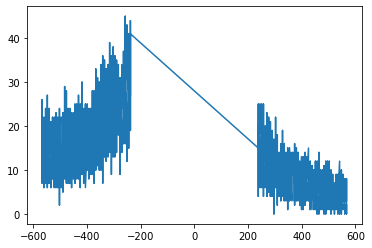

In [15]:
plt.plot(z_arr,hit_arr)
plt.show()

In [16]:
z_arr, hit_arr = mu3e_detector.Tiles.rateZ()

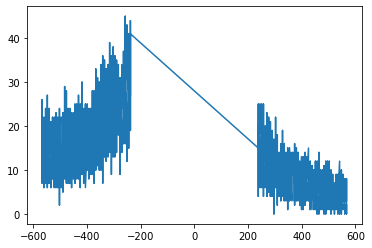

In [17]:
plt.plot(z_arr,hit_arr)
plt.show()

In [18]:
mu3e_detector.Tiles.tile[200999].pos

[23.096768680569443, -56.094901765031594, -457.345]

In [19]:
mu3e_detector.calcImpactVec("sorted_truth.root")

In [20]:
#mu3e_detector.Tiles.tile[200999].impact_vec


In [21]:
#mu3e_detector.Tiles.calcAngleTruth_byId()

In [22]:
mu3e_detector.Tiles.calcAngleTruth_byZ()

(array([-566.915, -566.915, -566.915, ...,  566.915,  566.915,  566.915]),
 array([ 46.10721114, 125.41422262,  45.7272301 , ..., 146.5671315 ,
         77.40262575, 144.6426273 ]))

In [23]:
binned, xedges, yedges = mu3e_detector.Tiles.getBinned()

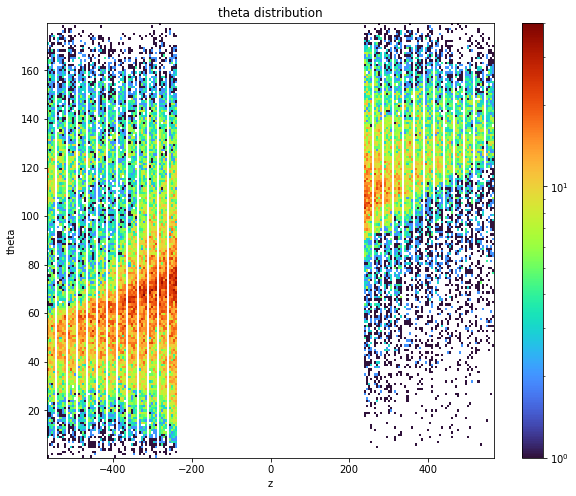

In [24]:
import numpy as np

fig = plt.figure(figsize=(10, 8))
import matplotlib as mpl
ax = fig.add_subplot(111, title='theta distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned.T, cmap="turbo", norm = mpl.colors.LogNorm())
plt.ylabel("theta")
plt.xlabel("z")
plt.colorbar(im)
plt.show()